In [26]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [61]:
alc_june = read.csv("data/alc-june.csv")
alc_sept = read.csv('data/alc-sept.csv')

In [84]:
turn_to_week <- function(df_june, df_sept){
    df_j <- df_june
    df_s <- df_sept
    df_j[,1] <- (df_j[,1] -1)%%7
    df_s[,1] <- (df_s[,1])%%7
    comb <- rbind(df_j[25:(24*28+24),], df_s[1:(24*28),])
    return(comb)
    
}

In [85]:
alc <- turn_to_week(alc_june, alc_sept)

In [86]:
proportion <- alc %>% group_by(Unnamed..0, Unnamed..1) %>% summarize(prop=sum(casual)/sum(total))

In [66]:
alc_foursquare <- read.csv('data/alc-foursquare.csv')

In [67]:
counts <- read.csv('data/counts.csv')

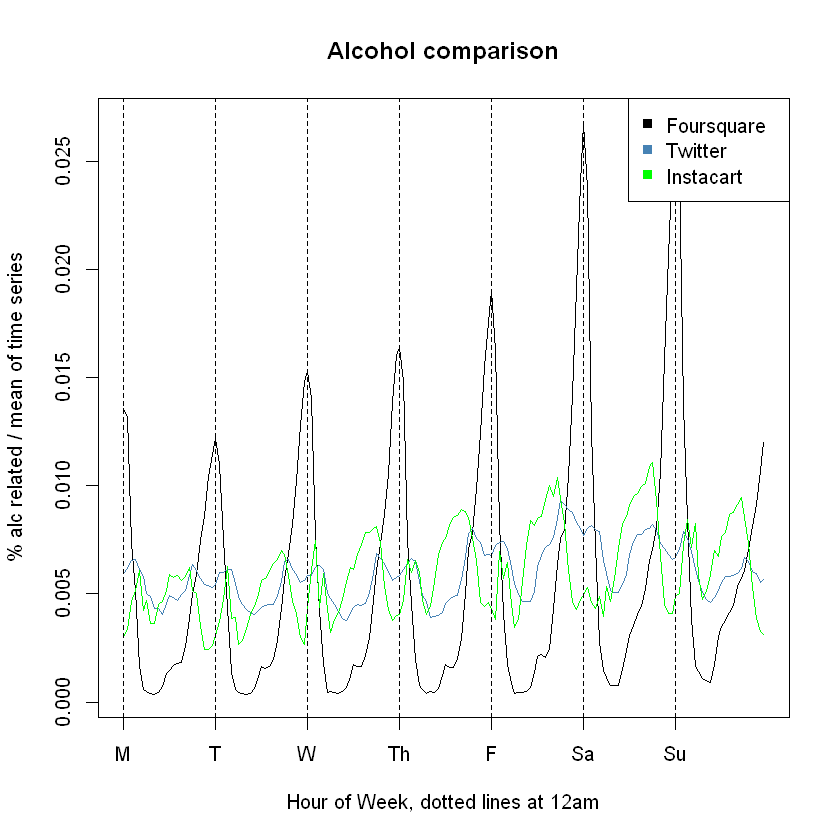

In [87]:
plot.ts(alc_foursquare[,3]/sum(alc_foursquare[,3]), xaxt='n', main='Alcohol comparison', ylab='% alc related / mean of time series', xlab='Hour of Week, dotted lines at 12am')
lines(proportion[,3]/sum(proportion[,3]), col='steelblue')
lines(counts[,6]/sum(counts[,6]), col='green')
axis(side=1, at=seq(1, 168, by=24), labels=c('M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'))
abline(v=seq(1, 168, by=24), lty=2)
legend("topright", legend=c('Foursquare', 'Twitter', 'Instacart'), col=c('black', 'steelblue', 'green'),pch=15)

In [89]:
tob_june = read.csv("data/tob-june.csv")
tob_sept = read.csv('data/tob-sept.csv')
shi_june = read.csv("data/shisha-june.csv")
shi_sept = read.csv('data/shisha-sept.csv')

In [90]:
tob <- turn_to_week(tob_june, tob_sept)
shi <- turn_to_week(shi_june, shi_sept)

In [93]:
head(tob)

,day,hour,sum,len
25,1,0,13,5661
26,1,1,9,3608
27,1,2,7,2210
28,1,3,3,1648
29,1,4,1,1384
30,1,5,1,1843


In [100]:
tob_foursquare <- read.csv('data/tob-foursquare.csv')

In [97]:
prop_tob <- tob %>% group_by(day, hour) %>% summarize(prop=sum(sum)/sum(len))
prop_shi <- shi %>% group_by(day, hour) %>% summarize(prop=sum(sum)/sum(len))

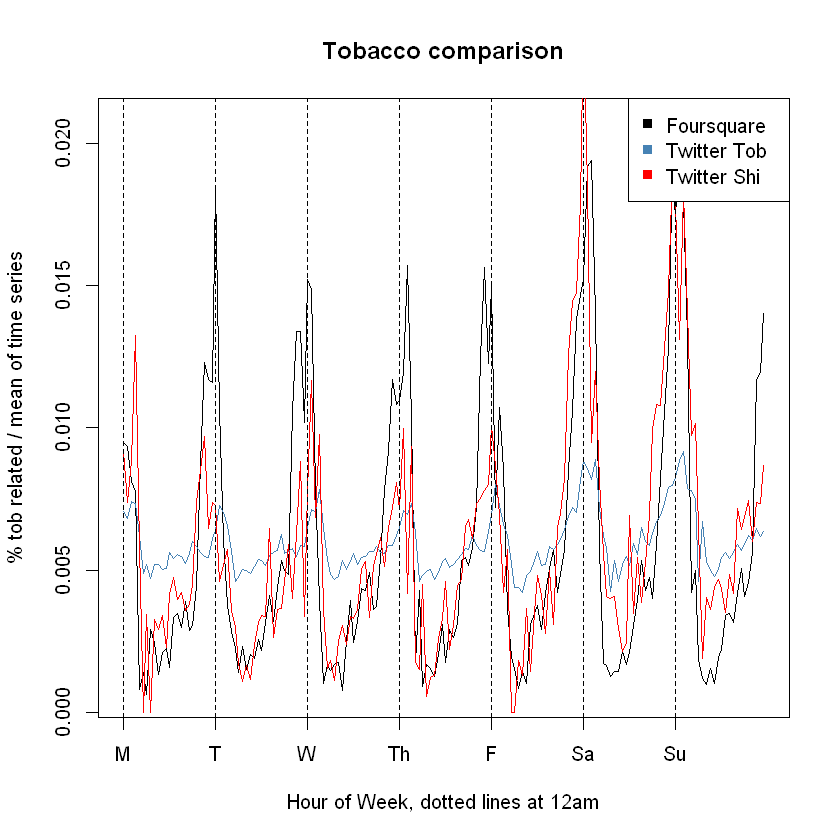

In [104]:
plot.ts(tob_foursquare[,3]/sum(tob_foursquare[,3]), xaxt='n', main='Tobacco comparison', ylab='% tob related / mean of time series', xlab='Hour of Week, dotted lines at 12am')
lines(prop_tob[,3]/sum(prop_tob[,3]), col='steelblue')
lines(prop_shi[,3]/sum(prop_shi[,3]), col='red')
axis(side=1, at=seq(1, 168, by=24), labels=c('M', 'T', 'W', 'Th', 'F', 'Sa', 'Su'))
abline(v=seq(1, 168, by=24), lty=2)
legend("topright", legend=c('Foursquare', 'Twitter Tob', 'Twitter Shi'), col=c('black', 'steelblue', 'red'),pch=15)